In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
insurance = pd.read_csv('insurance.csv')

In [10]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
x = insurance.copy()

**Charges - sex**

Text(0.5, 0, 'Sex')

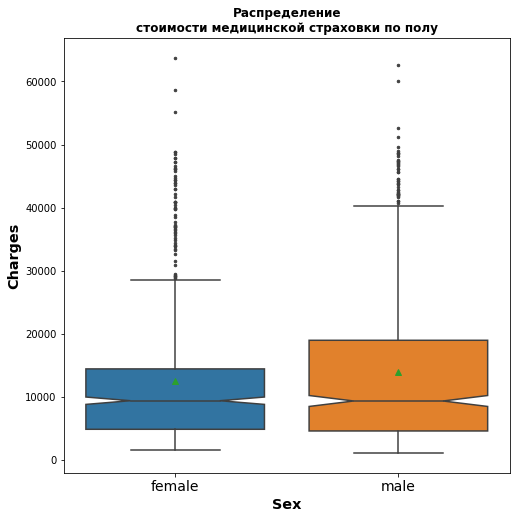

In [12]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['sex'], y=insurance['charges'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nстоимости медицинской страховки по полу', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Charges', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

In [13]:
changer = {'female': 1, 'male': 2}
x['sex'] = x['sex'].map(lambda x: changer[x])

In [14]:
H, pval = st.mstats.kruskalwallis(x['charges'].values, x['sex'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2070.9898341327116
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами sex и charges отсутствует

**Charges - smoker**

Text(0.5, 0, 'Smoker')

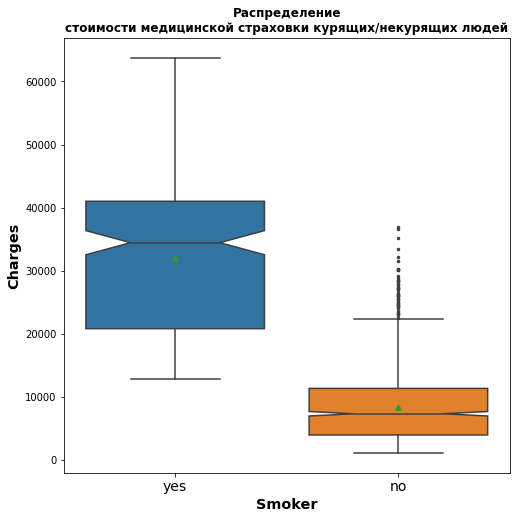

In [15]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['smoker'], y=insurance['charges'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nстоимости медицинской страховки курящих/некурящих людей', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Charges', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

In [16]:
changer = {'no': 1, 'yes': 2}
x['smoker'] = x['smoker'].map(lambda x: changer[x])

In [17]:
H, pval = st.mstats.kruskalwallis(x['charges'].values, x['smoker'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2143.2747335573636
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами smoker и charges отсутствует

**Charges - region**

Text(0.5, 0, 'Region')

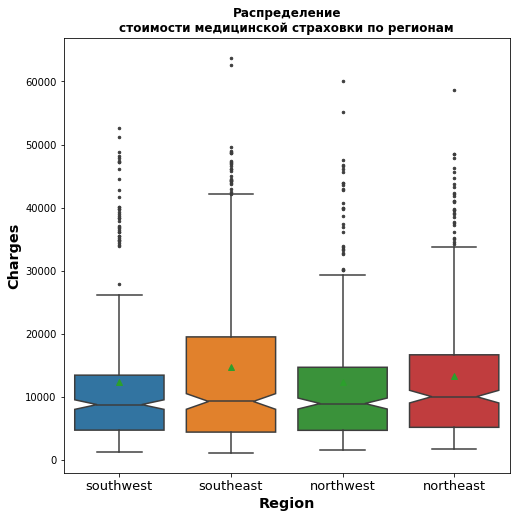

In [18]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['region'], y=insurance['charges'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nстоимости медицинской страховки по регионам', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Charges', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Region', fontsize='x-large', fontweight='semibold')


In [19]:
changer = {'northeast': 1, 'southwest': 2, 'northwest': 3, 'southeast': 4}
x['region'] = x['region'].map(lambda x: changer[x])

In [20]:
H, pval = st.mstats.kruskalwallis(x['charges'].values, x['region'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2022.1737247255996
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами region и charges отсутствует



---



---



**Charges - age**

In [ ]:
z = plt.figure(figsize=(8, 8))

ax1 = z.add_subplot(131)
sns.boxplot(x=insurance['sex'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax1.set_title('Распределение\nиндекса массы тела\nпо полу', fontsize='large', fontweight='semibold')
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.set_ylabel('BMI', fontsize='x-large', fontweight='semibold')
ax1.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

ax2 = z.add_subplot(132)
sns.boxplot(x=insurance['smoker'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax2.set_title('Распределение\nиндекса массы тела\nпо курящим/некурящим людям', fontsize='large', fontweight='semibold')
ax2.tick_params(axis='x', which='major', labelsize=14)
ax2.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax2.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

ax3 = z.add_subplot(133)
sns.boxplot(x=insurance['region'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax3.set_title('Распределение\nиндекса массы тела\nпо регионам', fontsize='large', fontweight='semibold')
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax3.set_xlabel('Region', fontsize='x-large', fontweight='semibold')
ax3.set_xticklabels(insurance['region'].unique(), rotation=45, ha='right')

z.subplots_adjust(right=1.5)

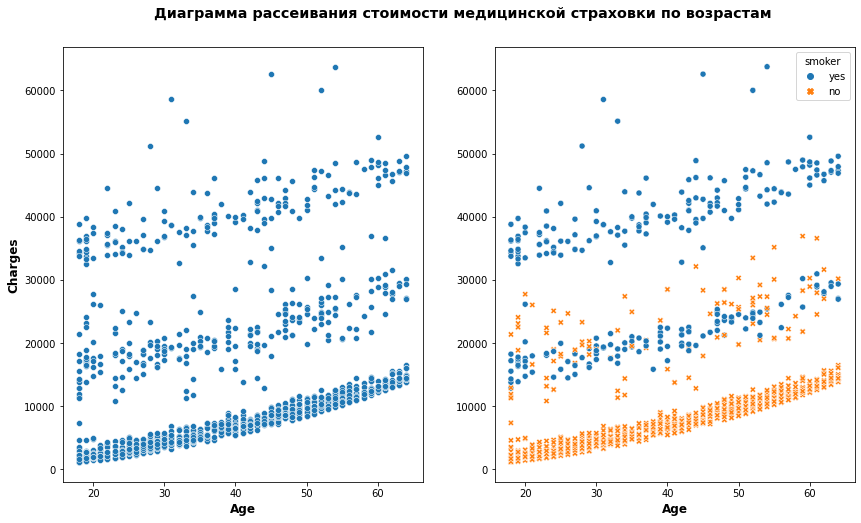

In [88]:
z = plt.figure(figsize=(8, 8))
z.suptitle('Диаграмма рассеивания стоимости медицинской страховки по возрастам', y=0.95, x=0.82, fontsize='x-large', fontweight='semibold')

ax1 = z.add_subplot(121)
sns.scatterplot(x=insurance['age'], y=insurance['charges'])
#plt.tick_params(axis='x', which='major', labelsize=13)
ax1.set_ylabel('Charges', fontsize='large', fontweight='semibold')
ax1.set_xlabel('Age', fontsize='large', fontweight='semibold')

ax2 = z.add_subplot(122)
sns.scatterplot(x=insurance['age'], y=insurance['charges'], hue=insurance['smoker'], style=insurance['smoker'])
ax2.set_ylabel('', fontsize='large', fontweight='semibold')
ax2.set_xlabel('Age', fontsize='large', fontweight='semibold')

z.subplots_adjust(right=1.5)

Text(0.5, 0, 'Age')

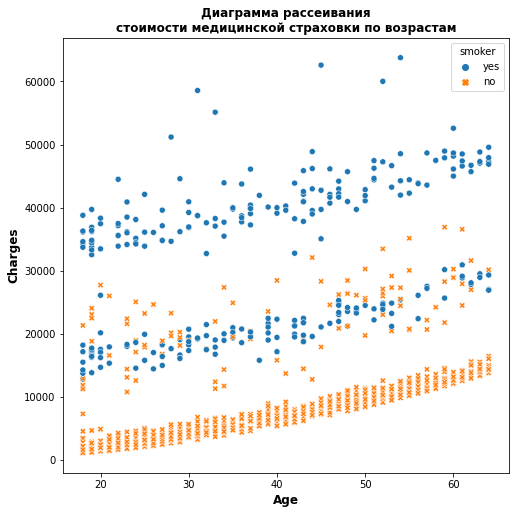

In [22]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['age'], y=insurance['charges'], hue=insurance['smoker'], style=insurance['smoker'])

plot.set_title('Диаграмма рассеивания\nстоимости медицинской страховки по возрастам', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Charges', fontsize='large', fontweight='semibold')
plot.set_xlabel('Age', fontsize='large', fontweight='semibold')

In [445]:
pearson = insurance['charges'].corr(insurance['age'], method='pearson')
spearman = insurance['charges'].corr(insurance['age'], method='spearman')
kendall = insurance['charges'].corr(insurance['age'], method='kendall')
pearson, spearman, kendall

(0.2990081933306476, 0.534392133771846, 0.47530235429087664)

In [446]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Значимость критерия Пирсона: 11.45312239435911
Значимость критерия Спирмана: 23.109202044514493
Значимость критерия Кендалла: 19.745953912872416


In [447]:
from scipy.stats import linregress
linregress(insurance['charges'].values, insurance['age'].values)

LinregressResult(slope=0.00034690746253208927, intercept=34.603416896331794, rvalue=0.2990081933306476, pvalue=4.886693331718841e-29, stderr=3.0289335133880002e-05)

**Charges - bmi**

Text(0.5, 0, 'BMI')

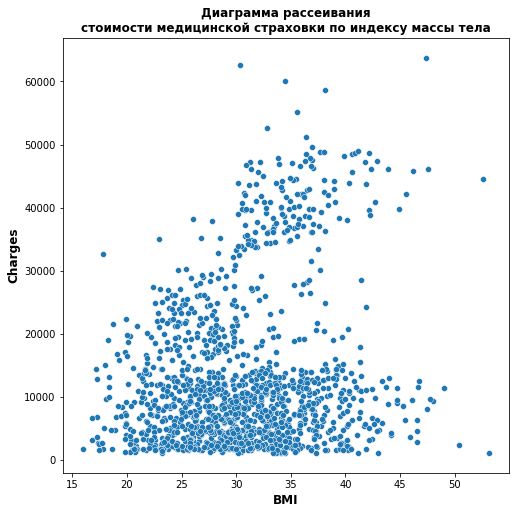

In [448]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['bmi'], y=insurance['charges'])

plot.set_title('Диаграмма рассеивания\nстоимости медицинской страховки по индексу массы тела', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Charges', fontsize='large', fontweight='semibold')
plot.set_xlabel('BMI', fontsize='large', fontweight='semibold')

In [449]:
pearson = insurance['charges'].corr(insurance['bmi'], method='pearson')
spearman = insurance['charges'].corr(insurance['bmi'], method='spearman')
kendall = insurance['charges'].corr(insurance['bmi'], method='kendall')
pearson, spearman, kendall

(0.19834096883362895, 0.11939590358331147, 0.08252397079981416)

In [450]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Значимость критерия Пирсона: 7.3965740755186875
Значимость критерия Спирмана: 4.395521901490544
Значимость критерия Кендалла: 3.026684980851688


**Charges - children**

Text(0.5, 0, 'Number of children/dependents')

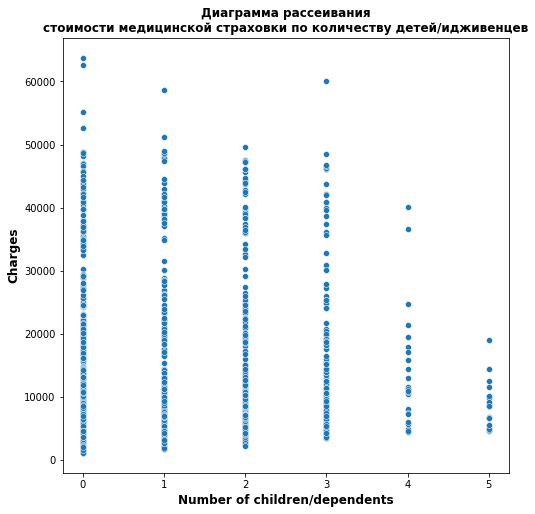

In [515]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['children'], y=insurance['charges'])

plot.set_title('Диаграмма рассеивания\nстоимости медицинской страховки по количеству детей/идживенцев', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Charges', fontsize='large', fontweight='semibold')
plot.set_xlabel('Number of children/dependents', fontsize='large', fontweight='semibold')

In [452]:
pearson = insurance['charges'].corr(insurance['children'], method='pearson')
spearman = insurance['charges'].corr(insurance['children'], method='spearman')
kendall = insurance['charges'].corr(insurance['children'], method='kendall')
pearson, spearman, kendall

(0.06799822684790478, 0.13333894319168219, 0.10310682138766057)

In [453]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Значимость критерия Пирсона: 2.4911918931127346
Значимость критерия Спирмана: 4.917628201666455
Значимость критерия Кендалла: 3.7888855075859613


**V - Cramer**

In [476]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

**Sex - Smoker**

In [483]:
pd.crosstab(insurance['sex'], insurance['smoker'], margins=True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [492]:
data = np.array([x['sex'].values, x['smoker'].values])
stat, p, dof, expected = st.chi2_contingency(data)
print('Значение статистики Хи-квадрат:', stat)

Значение статистики Хи-квадрат: 168.16551406490385


In [493]:
print('V-Крамер:', cramers_v(x['sex'].values, x['smoker'].values))

V-Крамер: 0.06914461040709625


In [494]:
p = 0.95 # Уровень доверия
value = st.chi2.ppf(p, dof) # Критическое значения распределения Хи-квадрат
print('Критическое значения распределения Хи-квадрат:', value)

if abs(stat) >= value:
	print('При уровне доверия', p, 'отклоняем нулевую гипотезу, что переменные являются независимыми')
else:
	print('При уровне доверия', p, 'принимаем нулевую гипотезу, что переменные являются независимыми')

Критическое значения распределения Хи-квадрат: 1423.178348824073
При уровне доверия 0.95 принимаем нулевую гипотезу, что переменные являются независимыми


**Sex - Region**

In [495]:
pd.crosstab(insurance['sex'], insurance['region'], margins=True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,161,189,163,676
All,324,325,364,325,1338


In [496]:
data = np.array([x['sex'].values, x['region'].values])
stat, p, dof, expected = st.chi2_contingency(data, correction=False)
print('Значение статистики Хи-квадрат:', stat)

Значение статистики Хи-квадрат: 415.88048267608866


In [497]:
print('V-Крамер:', cramers_v(x['sex'].values, x['region'].values))

V-Крамер: 0.0


In [498]:
p = 0.95 # Уровень доверия
value = st.chi2.ppf(p, dof) # Критическое значения распределения Хи-квадрат
print('Критическое значения распределения Хи-квадрат:', value)

if abs(stat) >= value:
	print('При уровне доверия', p, 'отклоняем нулевую гипотезу, что переменные являются независимыми')
else:
	print('При уровне доверия', p, 'принимаем нулевую гипотезу, что переменные являются независимыми')

Критическое значения распределения Хи-квадрат: 1423.178348824073
При уровне доверия 0.95 принимаем нулевую гипотезу, что переменные являются независимыми


**Smoker - Region**

In [499]:
pd.crosstab(insurance['smoker'], insurance['region'], margins=True)

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
All,324,325,364,325,1338


In [500]:
data = np.array([x['smoker'].values, x['region'].values])
stat, p, dof, expected = st.chi2_contingency(data)
print('Значение статистики Хи-квадрат:', stat)

Значение статистики Хи-квадрат: 345.3137265752816


In [501]:
print('V-Крамер:', cramers_v(x['smoker'].values, x['region'].values))

V-Крамер: 0.05698243611684278


In [502]:
p = 0.95 # Уровень доверия
value = st.chi2.ppf(p, dof) # Критическое значения распределения Хи-квадрат
print('Критическое значения распределения Хи-квадрат:', value)

if abs(stat) >= value:
	print('При уровне доверия', p, 'отклоняем нулевую гипотезу, что переменные являются независимыми')
else:
	print('При уровне доверия', p, 'принимаем нулевую гипотезу, что переменные являются независимыми')

Критическое значения распределения Хи-квадрат: 1423.178348824073
При уровне доверия 0.95 принимаем нулевую гипотезу, что переменные являются независимыми


**Age - BMI**

Text(0.5, 0, 'BMI')

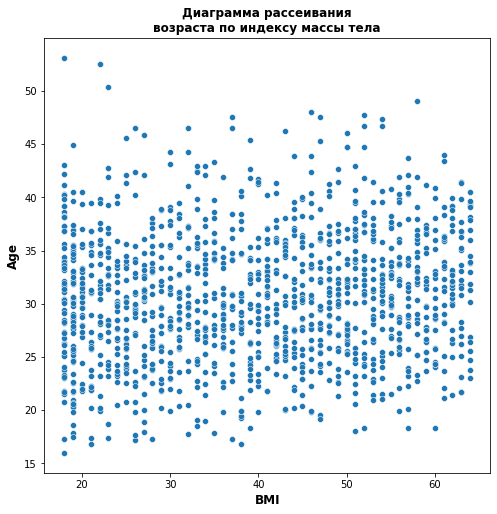

In [505]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['age'], y=insurance['bmi'])

plot.set_title('Диаграмма рассеивания\nвозраста по индексу массы тела', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Age', fontsize='large', fontweight='semibold')
plot.set_xlabel('BMI', fontsize='large', fontweight='semibold')

In [508]:
pearson = insurance['age'].corr(insurance['bmi'], method='pearson')
spearman = insurance['age'].corr(insurance['bmi'], method='spearman')
kendall = insurance['age'].corr(insurance['bmi'], method='kendall')
pearson, spearman, kendall

(0.1092718815485352, 0.10773603532023862, 0.07327326343408677)

In [509]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Значимость критерия Пирсона: 4.018093763784295
Значимость критерия Спирмана: 3.9609503606781065
Значимость критерия Кендалла: 2.685454273444448


**Age - Children**

Text(0.5, 0, 'Number of children/dependents')

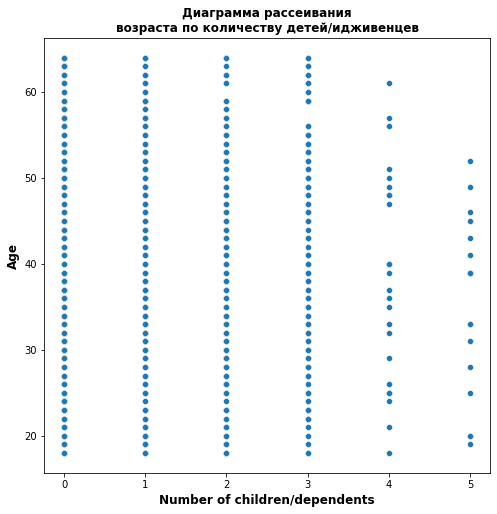

In [514]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['children'], y=insurance['age'])

plot.set_title('Диаграмма рассеивания\nвозраста по количеству детей/идживенцев', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Age', fontsize='large', fontweight='semibold')
plot.set_xlabel('Number of children/dependents', fontsize='large', fontweight='semibold')

In [516]:
pearson = insurance['age'].corr(insurance['children'], method='pearson')
spearman = insurance['age'].corr(insurance['children'], method='spearman')
kendall = insurance['age'].corr(insurance['children'], method='kendall')
pearson, spearman, kendall

(0.04246899855884944, 0.05699222356207542, 0.043252596539654)

In [517]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Значимость критерия Пирсона: 1.553700312585283
Значимость критерия Спирмана: 2.086533189943007
Значимость критерия Кендалла: 1.5824209716263484


**BMI - Children**

Text(0.5, 0, 'Number of children/dependents')

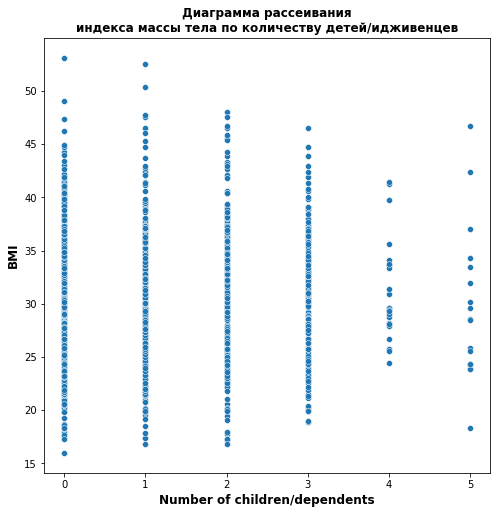

In [519]:
plt.figure(figsize=(8, 8))

plot = sns.scatterplot(x=insurance['children'], y=insurance['bmi'])

plot.set_title('Диаграмма рассеивания\nиндекса массы тела по количеству детей/идживенцев', fontsize='large', fontweight='semibold')
#plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('BMI', fontsize='large', fontweight='semibold')
plot.set_xlabel('Number of children/dependents', fontsize='large', fontweight='semibold')

In [520]:
pearson = insurance['bmi'].corr(insurance['children'], method='pearson')
spearman = insurance['bmi'].corr(insurance['children'], method='spearman')
kendall = insurance['bmi'].corr(insurance['children'], method='kendall')
pearson, spearman, kendall

(0.012758900820673815, 0.015606736191800299, 0.011562270379415793)

In [521]:
Tkr = st.t.ppf((1 + 0.95)/2, len(insurance)-2)
print('Критическое значение t критерия Стьюдента:', Tkr)

T = pearson * ((len(insurance) - 2) ** 0.5) / ((1 - pearson * pearson) ** 0.5)
print('Уровень значимости критерия Пирсона:', T)

T = spearman * ((len(insurance) - 2) ** 0.5) / ((1 - spearman * spearman) ** 0.5)
print('Уровень значимости критерия Спирмана:', T)

T = kendall * ((len(insurance) - 2) ** 0.5) / ((1 - kendall * kendall) ** 0.5)
print('Уровень значимости критерия Кендалла:', T)

Критическое значение t критерия Стьюдента: 1.9617412190546957
Уровень значимости критерия Пирсона: 0.4663928058535131
Уровень значимости критерия Спирмана: 0.5705165081742146
Уровень значимости критерия Кендалла: 0.4226446555204468


**Age - Sex**

Text(0.5, 0, 'Sex')

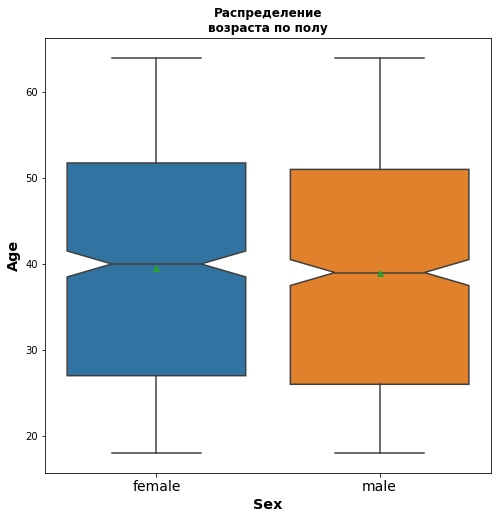

In [522]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['sex'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nвозраста по полу', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Age', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

In [526]:
H, pval = st.mstats.kruskal(x['age'].values, x['sex'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2071.15828179942
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами age и sex отсутствует

**Age - Smoker**

Text(0.5, 0, 'Smoker')

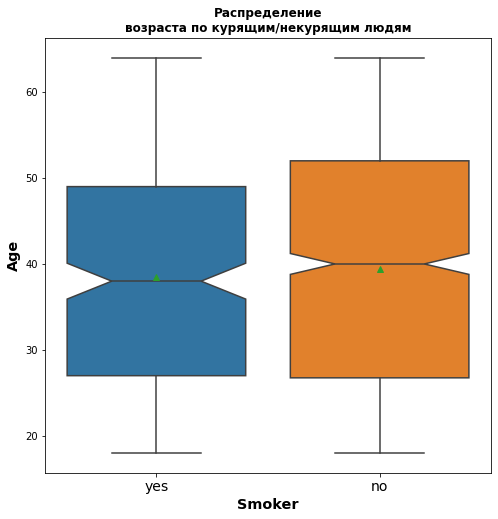

In [527]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['smoker'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nвозраста по курящим/некурящим людям', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Age', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

In [528]:
H, pval = st.mstats.kruskal(x['age'].values, x['smoker'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2143.455145792421
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами age и smoker отсутствует

**Age - Region**

Text(0.5, 0, 'Region')

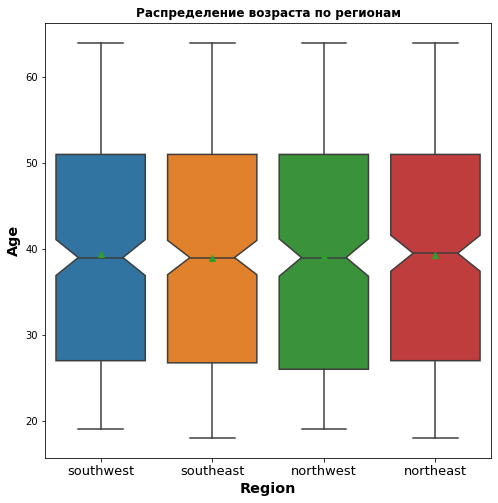

In [531]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['region'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение возраста по регионам', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Age', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Region', fontsize='x-large', fontweight='semibold')

In [536]:
H, pval = st.mstats.kruskal(x['age'].values, x['region'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2022.334324584335
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами age и region отсутствует

**BMI - Sex**

Text(0.5, 0, 'Sex')

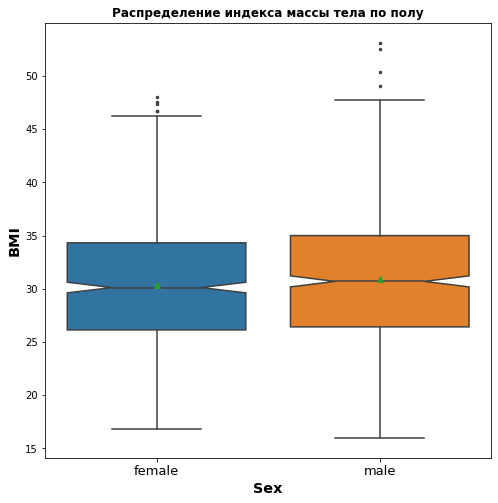

In [537]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['sex'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение индекса массы тела по полу', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('BMI', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

In [538]:
H, pval = st.mstats.kruskal(x['bmi'].values, x['sex'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2070.992409187856
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами BMI и Sex отсутствует

**BMI - Smoker**

Text(0.5, 0, 'Smoker')

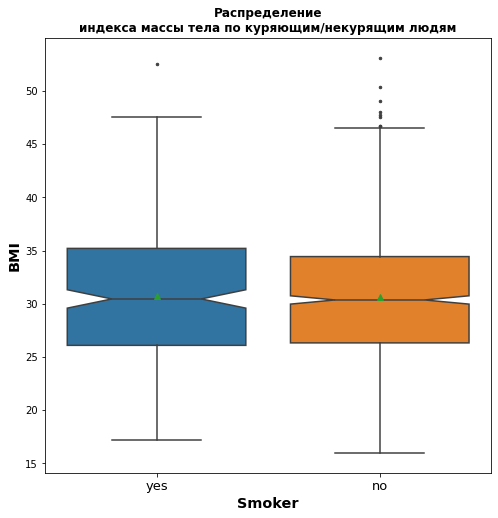

In [540]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['smoker'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nиндекса массы тела по куряющим/некурящим людям', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('BMI', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

In [541]:
H, pval = st.mstats.kruskal(x['bmi'].values, x['sex'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2070.992409187856
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами BMI и Smoker отсутствует

**BMI - Region**

Text(0.5, 0, 'Region')

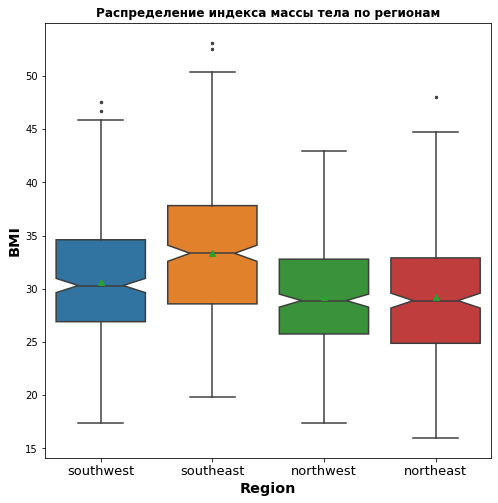

In [543]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['region'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение индекса массы тела по регионам', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('BMI', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Region', fontsize='x-large', fontweight='semibold')

In [550]:
H, pval = st.mstats.kruskal(x['bmi'].values, x['region'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 2022.1761798161406
P-Value: 0.0


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами BMI и Region отсутствует

**Children - Sex**

Text(0.5, 0, 'Sex')

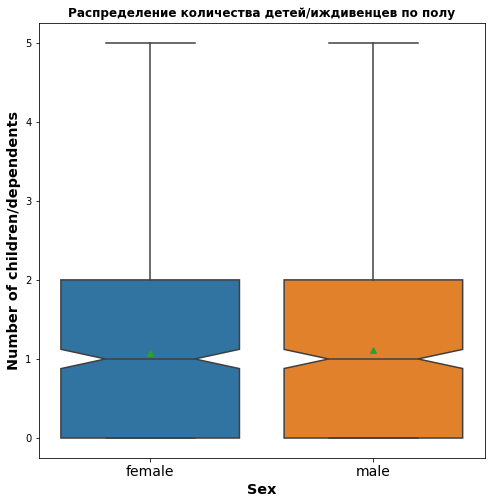

In [545]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['sex'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение количества детей/иждивенцев по полу', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Number of children/dependents', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

In [558]:
H, pval = st.mstats.kruskalwallis(x['children'].values, x['sex'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 218.60201684555383
P-Value: 1.825255594912566e-49


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами children и sex отсутствует

**Children - Smoker**

Text(0.5, 0, 'Smoker')

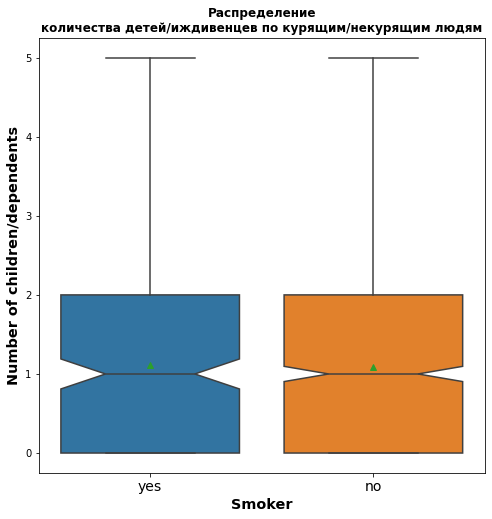

In [548]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['smoker'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение\nколичества детей/иждивенцев по курящим/некурящим людям', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=14)
plot.set_ylabel('Number of children/dependents', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

In [557]:
H, pval = st.mstats.kruskalwallis(x['children'].values, x['smoker'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 82.72279518272168
P-Value: 9.440623190012711e-20


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами children и smoker отсутствует

**Children - Region**

Text(0.5, 0, 'Region')

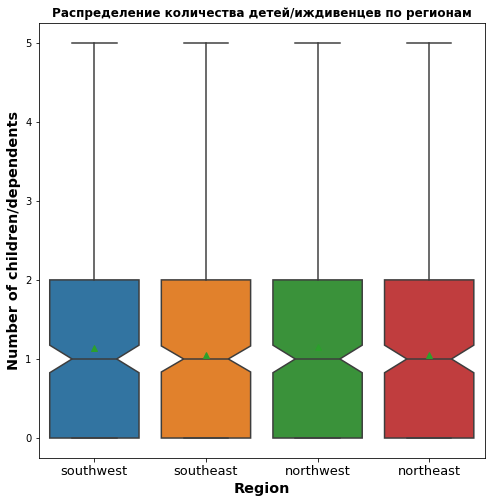

In [554]:
plt.figure(figsize=(8, 8))

plot = sns.boxplot(x=insurance['region'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))

plot.set_title('Распределение количества детей/иждивенцев по регионам', fontsize='large', fontweight='semibold')
plt.tick_params(axis='x', which='major', labelsize=13)
plot.set_ylabel('Number of children/dependents', fontsize='x-large', fontweight='semibold')
plot.set_xlabel('Region', fontsize='x-large', fontweight='semibold')

In [556]:
H, pval = st.mstats.kruskalwallis(x['children'].values, x['region'].values)
print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 778.0357680483553
P-Value: 3.217832809489459e-171


P-value меньше 0.05, значит отвергаем нулевую гипотезу, что связь между параметрами children и region отсутствует



---



---



---



---



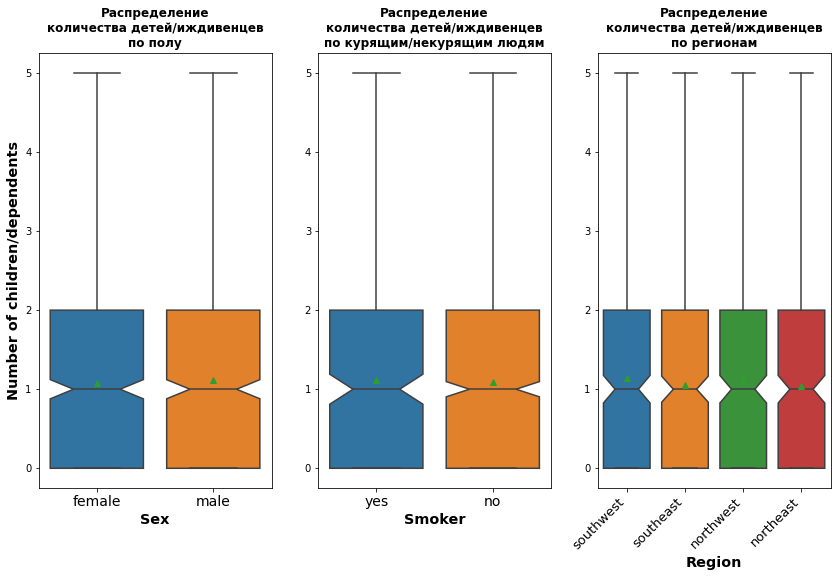

In [62]:
z = plt.figure(figsize=(8, 8))

ax1 = z.add_subplot(131)
sns.boxplot(x=insurance['sex'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax1.set_title('Распределение\nколичества детей/иждивенцев\nпо полу', fontsize='large', fontweight='semibold')
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.set_ylabel('Number of children/dependents', fontsize='x-large', fontweight='semibold')
ax1.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

ax2 = z.add_subplot(132)
sns.boxplot(x=insurance['smoker'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax2.set_title('Распределение\nколичества детей/иждивенцев\nпо курящим/некурящим людям', fontsize='large', fontweight='semibold')
ax2.tick_params(axis='x', which='major', labelsize=14)
ax2.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax2.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

ax3 = z.add_subplot(133)
sns.boxplot(x=insurance['region'], y=insurance['children'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax3.set_title('Распределение\nколичества детей/иждивенцев\nпо регионам', fontsize='large', fontweight='semibold')
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax3.set_xlabel('Region', fontsize='x-large', fontweight='semibold')
ax3.set_xticklabels(insurance['region'].unique(), rotation=45, ha='right')

z.subplots_adjust(right=1.5)

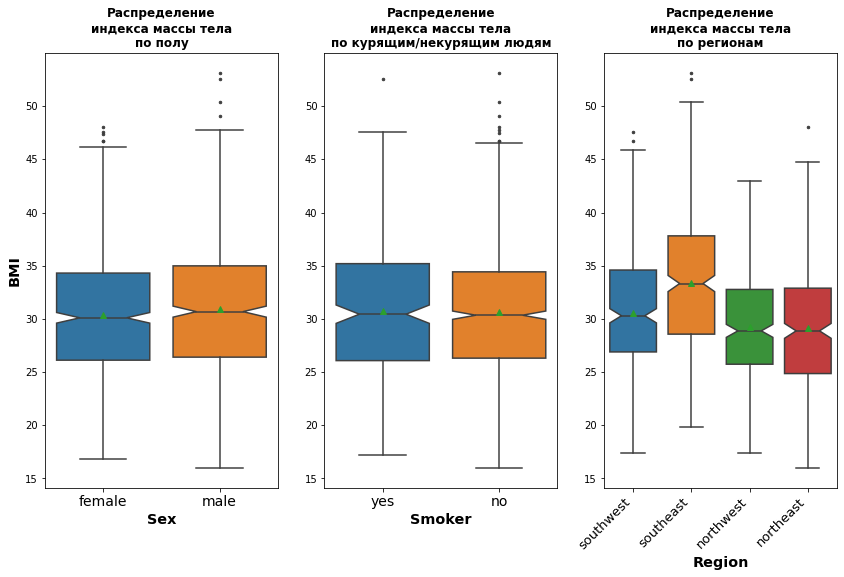

In [63]:
z = plt.figure(figsize=(8, 8))

ax1 = z.add_subplot(131)
sns.boxplot(x=insurance['sex'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax1.set_title('Распределение\nиндекса массы тела\nпо полу', fontsize='large', fontweight='semibold')
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.set_ylabel('BMI', fontsize='x-large', fontweight='semibold')
ax1.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

ax2 = z.add_subplot(132)
sns.boxplot(x=insurance['smoker'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax2.set_title('Распределение\nиндекса массы тела\nпо курящим/некурящим людям', fontsize='large', fontweight='semibold')
ax2.tick_params(axis='x', which='major', labelsize=14)
ax2.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax2.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

ax3 = z.add_subplot(133)
sns.boxplot(x=insurance['region'], y=insurance['bmi'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax3.set_title('Распределение\nиндекса массы тела\nпо регионам', fontsize='large', fontweight='semibold')
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax3.set_xlabel('Region', fontsize='x-large', fontweight='semibold')
ax3.set_xticklabels(insurance['region'].unique(), rotation=45, ha='right')

z.subplots_adjust(right=1.5)

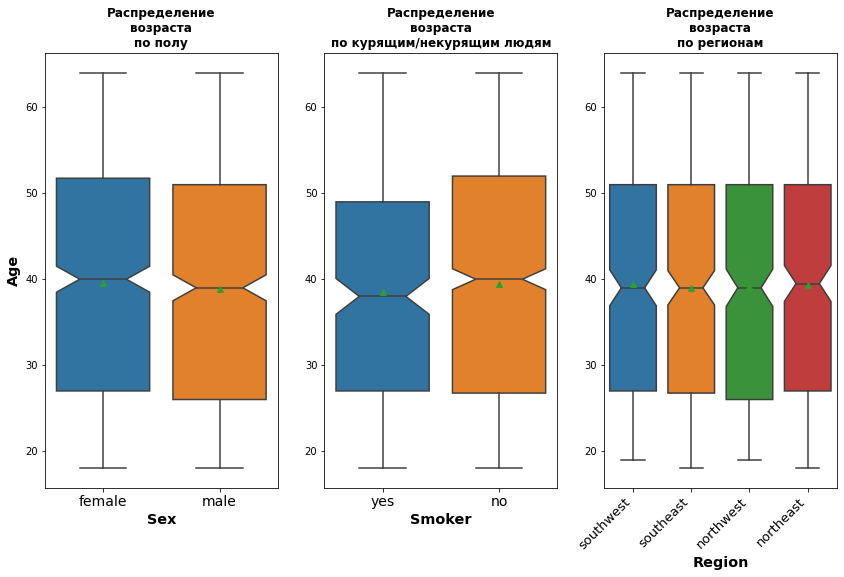

In [64]:
z = plt.figure(figsize=(8, 8))

ax1 = z.add_subplot(131)
sns.boxplot(x=insurance['sex'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax1.set_title('Распределение\nвозраста\nпо полу', fontsize='large', fontweight='semibold')
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.set_ylabel('Age', fontsize='x-large', fontweight='semibold')
ax1.set_xlabel('Sex', fontsize='x-large', fontweight='semibold')

ax2 = z.add_subplot(132)
sns.boxplot(x=insurance['smoker'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax2.set_title('Распределение\nвозраста\nпо курящим/некурящим людям', fontsize='large', fontweight='semibold')
ax2.tick_params(axis='x', which='major', labelsize=14)
ax2.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax2.set_xlabel('Smoker', fontsize='x-large', fontweight='semibold')

ax3 = z.add_subplot(133)
sns.boxplot(x=insurance['region'], y=insurance['age'], notch = True, showmeans=True, flierprops=dict(marker='.'))
ax3.set_title('Распределение\nвозраста\nпо регионам', fontsize='large', fontweight='semibold')
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.set_ylabel('', fontsize='x-large', fontweight='semibold')
ax3.set_xlabel('Region', fontsize='x-large', fontweight='semibold')
ax3.set_xticklabels(insurance['region'].unique(), rotation=45, ha='right')

z.subplots_adjust(right=1.5)



---



---



---



Text(0.5, 0, 'Sex')

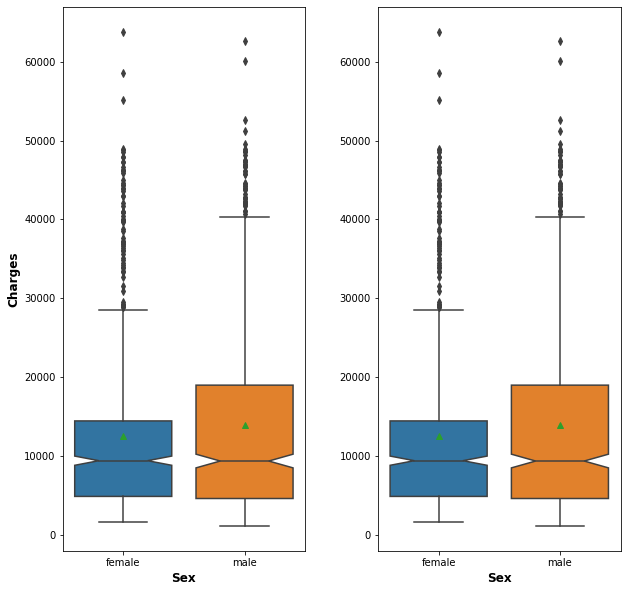

In [227]:
#plt.figure(figsize=(10, 10))
z = plt.figure(figsize=(10, 10))
ax1 = z.add_subplot(121)
sns.boxplot(x=insurance['sex'], y=insurance['charges'], notch = True, showmeans=True)
ax2 = z.add_subplot(122)
sns.boxplot(x=insurance['sex'], y=insurance['charges'], notch = True, showmeans=True)
z.subplots_adjust(wspace=0.3, hspace=0.5)

ax1.set_ylabel('Charges', fontsize='large', fontweight='semibold')
ax1.set_xlabel('Sex', fontsize='large', fontweight='semibold')

ax2.set_ylabel('', fontsize='large', fontweight='semibold')
ax2.set_xlabel('Sex', fontsize='large', fontweight='semibold')

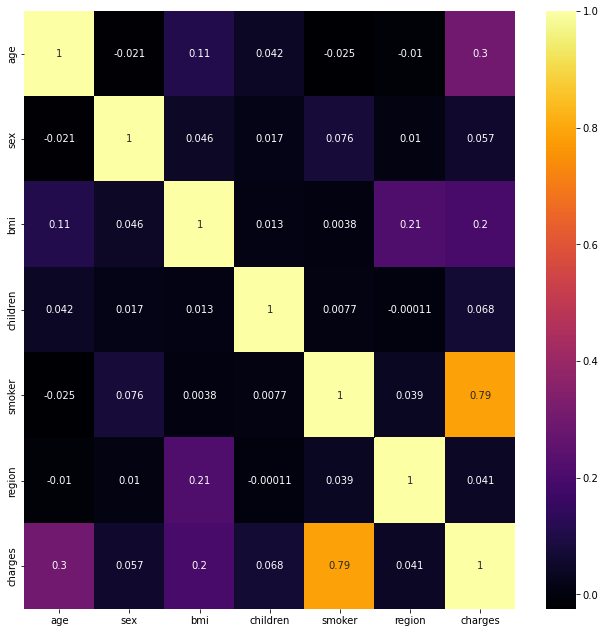

In [312]:
plt.figure(figsize=(11, 11))
sns.heatmap(x.corr(method="pearson"), annot=True, cmap = 'inferno')